<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import mapclassify   # 2.3.0
import seaborn as sns

%config InlineBackend.figure_format = 'retina'



In [2]:
# Create a data directory
shapedir='/Users/maartenk/Documents/git/CookBooks/Sources/ShapeFiles/georef-germany-kreis/'



In [3]:
# read files: German shapefile
#https://public.opendatasoft.com/explore/dataset/covid-19-germany-landkreise/download/?format=shp&timezone=Europe/Berlin&lang=en
# https://public.opendatasoft.com/explore/dataset/covid-19-germany-landkreise/export/

file = '/Users/maartenk/Downloads/covid-19-germany-landkreise/covid-19-germany-landkreise.shp' 
# fp = shapedir+file
map_df_woonplaats = gpd.read_file(file)

url = 'https://public.opendatasoft.com/explore/dataset/covid-19-germany-landkreise/download/?format=shp&timezone=Europe/Berlin&lang=en'
# create geopandas
# map_df_woonplaats = gpd.read_file(url)

map_df_woonplaats.tail(3)

last_update                 name  ade   gf  bsg     rs  \
408  2022-02-20 01:00:00+01:00    Dingolfing-Landau  4.0  4.0  1.0  09279   
409  2022-02-20 01:00:00+01:00         UnterallgÃ¤u  4.0  4.0  1.0  09778   
410  2022-02-20 01:00:00+01:00  Nordwestmecklenburg  4.0  4.0  1.0  13074   

           sdv_rs        bez   ibz nbd  ...                  county recovered  \
408  092790112112  Landkreis  43.0  ja  ...    LK Dingolfing-Landau      None   
409  097780173173  Landkreis  43.0  ja  ...         LK UnterallgÃ¤u      None   
410  130740087087  Landkreis  43.0  ja  ...  LK Nordwestmecklenburg      None   

         ewz_bl cases7_bl death7_bl cases7_lk death7_lk cases7_p_1  admunitid  \
408  13140183.0  233039.0      21.0    1965.0       1.0     2020,7     9279.0   
409  13140183.0  233039.0      21.0    2997.0       1.0     2050,4     9778.0   
410   1610774.0   23176.0       8.0    2144.0       0.0     1357,2    13074.0   

                                              geometry  
408  POLYGON ((12.75290 48.79934, 12.76138 48.79743...  
409  MULTIPOLYGON (((10.13239 48.01540, 10.13341 48...  
410  MULTIPOLYGON (((11.47696 53.96398, 11.47744 53...  

[3 rows x 40 columns]

In [4]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
print("Geometry Column Name : ", world.geometry.name)
print("Dataset Size : ", world.shape)
world.head()

Geometry Column Name :  geometry
Dataset Size :  (177, 6)


pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [5]:
#https://github.com/jgehrcke/covid-19-germany-gae/blob/master/cases-rki-by-ags.csv
# df = pd.read_csv('/Users/maartenk/Documents/git/CookBooks/Sources/cases-rki-by-ags.csv', sep=',', index_col='time_iso8601')
# df.shape

In [5]:
url = 'https://raw.githubusercontent.com/jgehrcke/covid-19-germany-gae/master/cases-rki-by-ags.csv'
df = pd.read_csv(url, index_col=0)
df.tail(5)

1001   1002   1003   1004   1051   1053   1054  \
time_iso8601                                                                
2022-03-14T17:00:00+0000  16660  34169  32115  12285  17452  28119  23019   
2022-03-15T17:00:00+0000  16927  34755  32643  12590  17948  28813  23933   
2022-03-16T17:00:00+0000  17221  35451  33454  12813  18394  29305  24610   
2022-03-17T17:00:00+0000  17591  36088  33840  13069  19019  29800  25139   
2022-03-18T17:00:00+0000  17887  36832  34266  13236  19462  30176  25728   

                           1055   1056   1057  ...  16070  16071  16072  \
time_iso8601                                   ...                        
2022-03-14T17:00:00+0000  20989  47604  12088  ...  25499  18956  14668   
2022-03-15T17:00:00+0000  21496  48630  12589  ...  25787  19198  14851   
2022-03-16T17:00:00+0000  22100  49547  12974  ...  26300  19795  15015   
2022-03-17T17:00:00+0000  22588  50164  13386  ...  26812  20238  15176   
2022-03-18T17:00:00+0000  22955  50326  13731  ...  27120  20514  15236   

                          16073  16074  16075  16076  16077   11000  sum_cases  
time_iso8601                                                                    
2022-03-14T17:00:00+0000  26922  21787  22572  21307  22884  810263   17549683  
2022-03-15T17:00:00+0000  27358  22149  22754  21493  23481  818895   17826101  
2022-03-16T17:00:00+0000  28244  22663  22897  21659  23972  827969   18115191  
2022-03-17T17:00:00+0000  28714  23330  23012  21945  24514  834903   18376342  
2022-03-18T17:00:00+0000  28930  23557  23088  22168  24831  839361   18548225  

[5 rows x 414 columns]

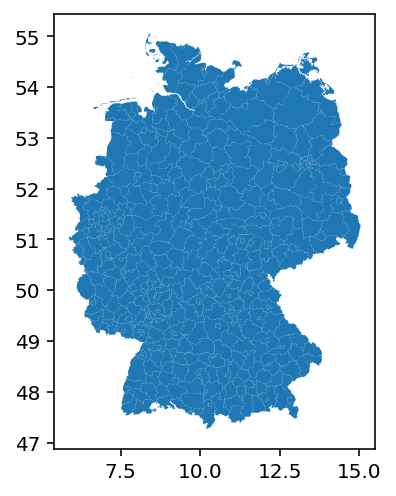

In [6]:
map_df_woonplaats.plot();

In [7]:
map_df_woonplaats.shape

(411, 40)

In [8]:
map_df_woonplaats.columns

Index(['last_update', 'name', 'ade', 'gf', 'bsg', 'rs', 'sdv_rs', 'bez', 'ibz',
       'nbd', 'sn_l', 'sn_r', 'sn_k', 'fk_s3', 'nuts', 'rs_0', 'ags_0', 'wsk',
       'ewz', 'kfl', 'debkg_id', 'shape_are', 'deaths', 'death_rate', 'cases',
       'cases_per_1', 'cases7_per_', 'cases_per_p', 'bl', 'bl_id', 'county',
       'recovered', 'ewz_bl', 'cases7_bl', 'death7_bl', 'cases7_lk',
       'death7_lk', 'cases7_p_1', 'admunitid', 'geometry'],
      dtype='object')

https://public.opendatasoft.com/explore/dataset/covid-19-germany-landkreise/information/

In [9]:
cols = df.columns[:-1]

df = df[cols].diff()

df = df.iloc[1: , :]

df.index = df.index.str[:10]

df.index.min(), df.index.max()



('2020-03-03', '2022-03-18')

In [12]:
start = df.index.min()
stop = df.index.max()

In [11]:
start = '2020-02-03'
stop = '2020-12-31'

In [13]:
updated = df.index.max()
updated

'2022-03-18'

In [14]:
groupedGem = df.loc[(df.index >= start) &
      (df.index <= stop)][cols].sum()

groupedGem = groupedGem.rename_axis('krs_code').reset_index()

groupedGem['krs_code'] = groupedGem['krs_code'].str.zfill(5)

In [15]:
map_df_combined = pd.merge(map_df_woonplaats, groupedGem, left_on=map_df_woonplaats['rs'], 
                           right_on=groupedGem['krs_code'])

map_df_combined['CovDens']= map_df_combined['cases']/map_df_combined['ewz']

map_df_combined['CovDensPm'] = map_df_combined['CovDens']*1000000

map_df_combined['area'] = map_df_combined.geometry.to_crs({'proj':'cea'}).area/1000000 #for hectares

map_df_combined['CovPsqKm'] = map_df_combined['cases']/map_df_combined['area']

# map_df_combined[['CovDensPm', 'cases_per_1' ]]

In [16]:
map_df_combined.shape

(411, 47)

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator


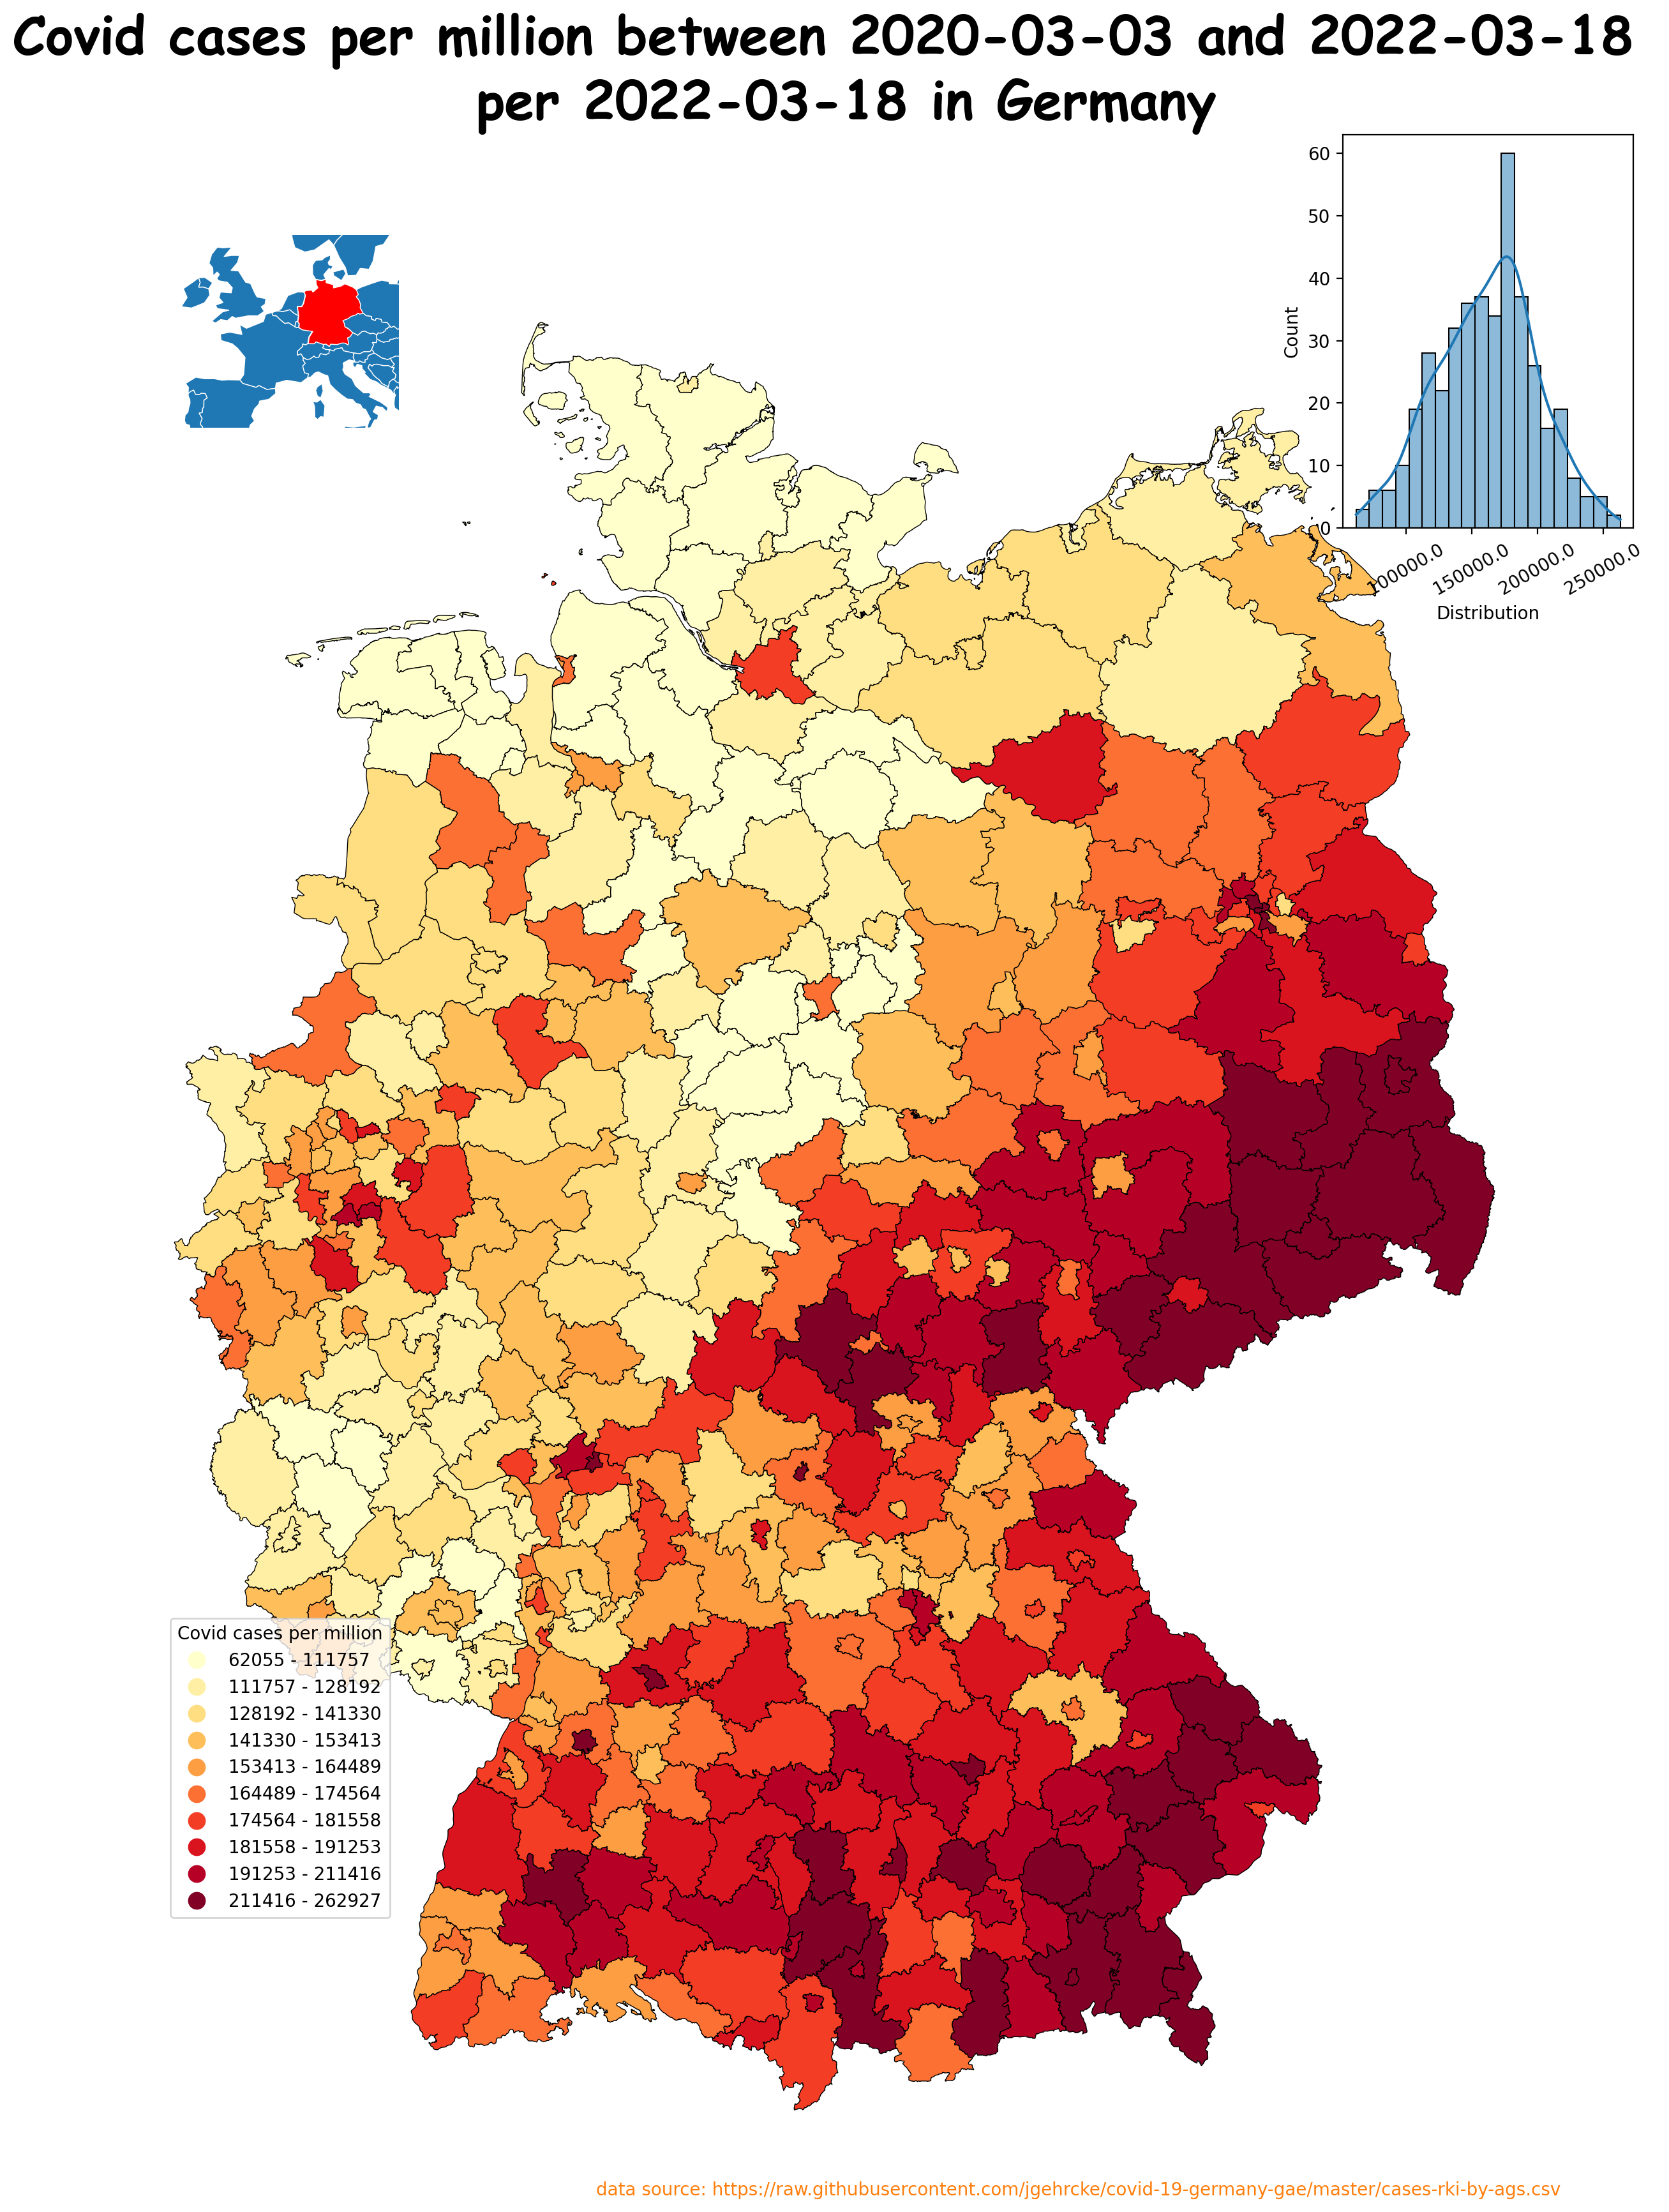

In [18]:
name = 'Covid cases per million'
column = pd.Series(map_df_combined['CovDensPm'], name = name)
countries = ['Germany']
russia = ['Russia']

#plot the density
fig, de_ax = plt.subplots(figsize=(20, 20))
plt.style.use('default')

de_ax.axis('off')


map_df_combined.plot(column=column, 
                cmap='YlOrRd',#'tab20', 
                label=column, 
                scheme='quantiles',
                legend=True,
                k=10,
                ec='black',
                lw=.5,
                ax=de_ax)

plt.title(f'{name} between {start} and {stop} \n per {updated} in {str(countries)[2:-2]}', 
          fontname="Comic Sans MS", fontsize=30, fontweight="bold")

eu_ax = de_ax.inset_axes([0.05,0.85,.15,.20])
world.loc[(world['continent'] == 'Europe') & (~world['name'].isin([countries, russia]))].plot(
    ax=eu_ax, ec='white', lw=.5)
world.loc[world['name'].isin(countries)].plot(
    ax=eu_ax, ec='white', fc = 'red', lw=.5)


eu_ax.set_xlim(-10,20)
eu_ax.set_ylim(38,60)
eu_ax.axis('off')
# get all upper bounds

hist_ax = de_ax.inset_axes([0.85,0.85,.20,.20])
# map_df_combined['CovDens'].plot(kind='hist', ax=hist_ax)

x = pd.Series(column, name='Distribution')
sns.histplot(x, bins=20,ax=hist_ax, kde=True)
a=hist_ax.get_xticks().tolist()
hist_ax.set_xticklabels(a, rotation=30)
# hist_ax.set_xticklabels(hist_ax.get_xticklabels(), rotation = 30)
# sns.kdeplot(data=x, c='red', ax=hist_ax, zorder=99)

upper_bounds = mapclassify.Quantiles(column, k=10).bins

# get and format all bounds
bounds = []
for index, upper_bound in enumerate(upper_bounds):
    if index == 0:
        lower_bound = column.min()
    else:
        lower_bound = upper_bounds[index-1]

    # format the numerical legend here
    bound = f'{lower_bound:.0f} - {upper_bound:.0f}'
    bounds.append(bound)

# get all the legend labels
legend_labels = de_ax.get_legend().get_texts()

# replace the legend labels
for bound, legend_label in zip(bounds, legend_labels):
    legend_label.set_text(bound)
                                     
leg = de_ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.3))

leg.set_title(name)
plt.setp(leg.get_title(), multialignment='center')
plt.setp(leg.get_texts(), multialignment='center');


text_kwargs = dict(ha='right', va='bottom', fontsize=10, color='C1')

plt.text(1,0,f'data source: {url}', transform=de_ax.transAxes,
     **text_kwargs);


/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator


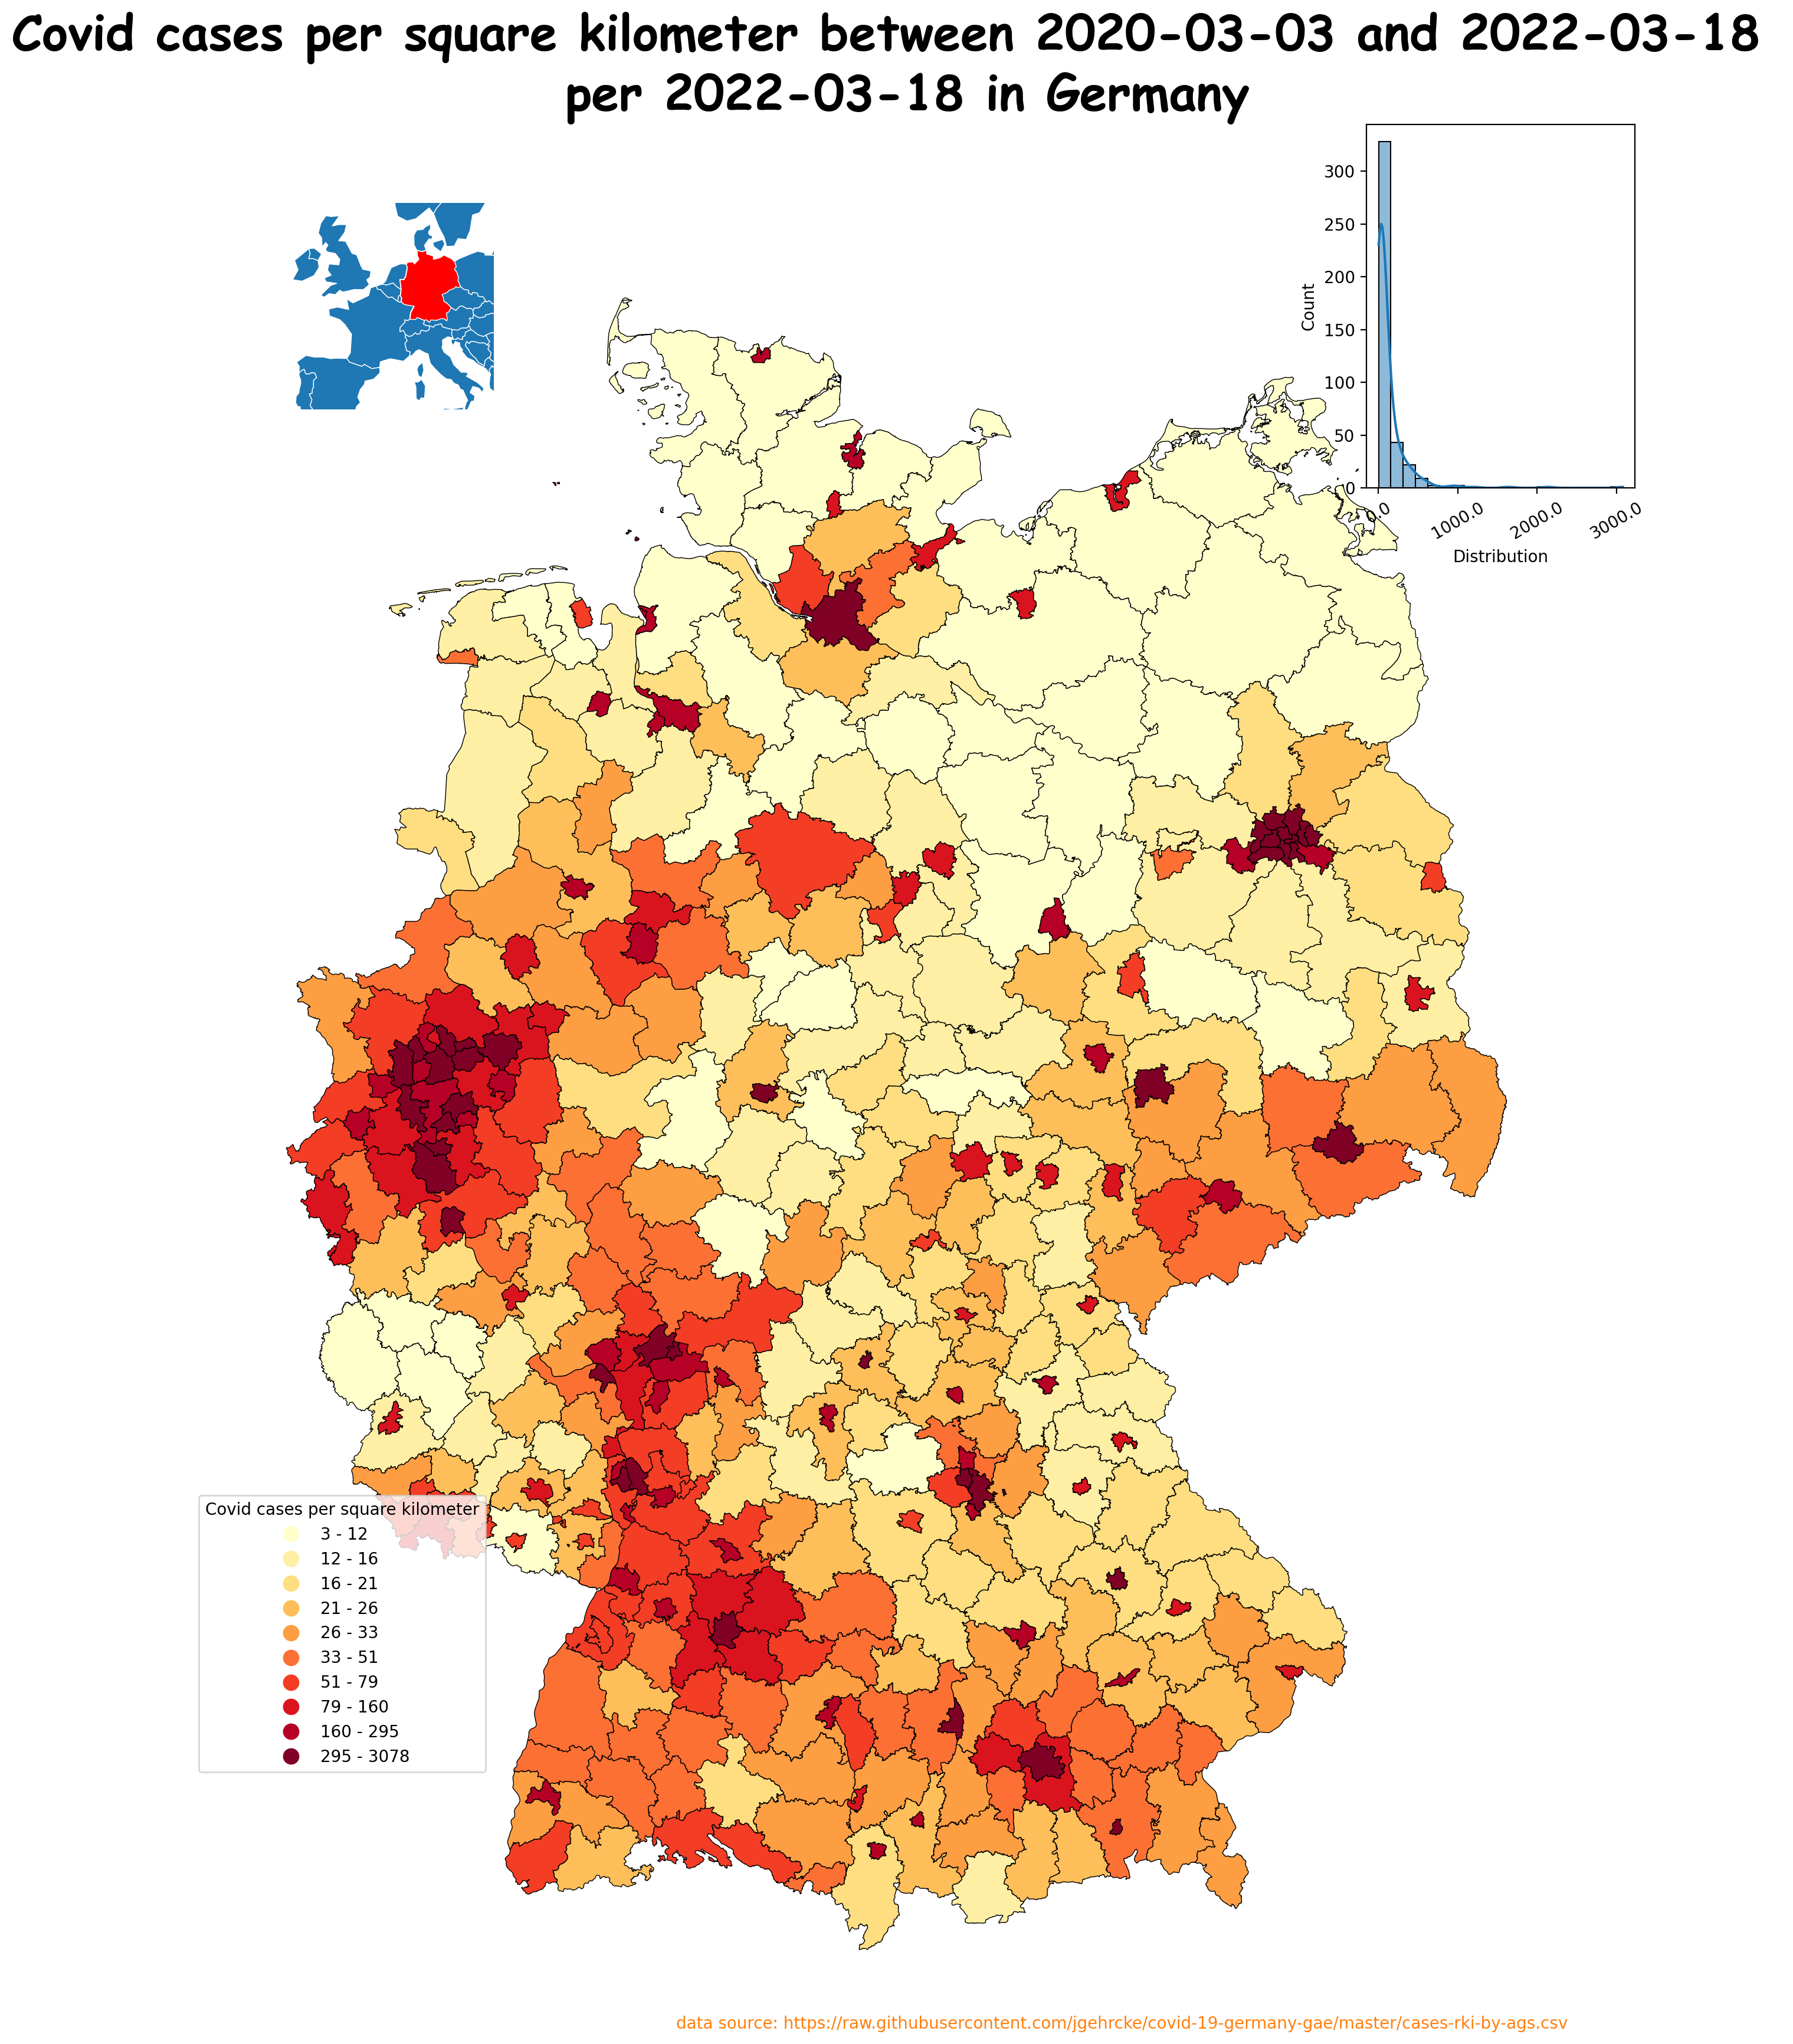

In [19]:
name = 'Covid cases per square kilometer'
column = pd.Series(map_df_combined['CovPsqKm'], name = name)
countries = ['Germany']
russia = ['Russia']

#plot the density
fig, de_ax = plt.subplots(figsize=(20, 20))
plt.style.use('default')

de_ax.axis('off')


map_df_combined.plot(column=column, 
                cmap='YlOrRd',#'tab20', 
                label=column, 
                scheme='quantiles',
                legend=True,
                k=10,
                ec='black',
                lw=.5,
                ax=de_ax)

plt.title(f'{name} between {start} and {stop} \n per {updated} in {str(countries)[2:-2]}', 
          fontname="Comic Sans MS", fontsize=30, fontweight="bold")

eu_ax = de_ax.inset_axes([0.05,0.85,.15,.20])
world.loc[(world['continent'] == 'Europe') & (~world['name'].isin([countries, russia]))].plot(
    ax=eu_ax, ec='white', lw=.5)
world.loc[world['name'].isin(countries)].plot(
    ax=eu_ax, ec='white', fc = 'red', lw=.5)


eu_ax.set_xlim(-10,20)
eu_ax.set_ylim(38,60)
eu_ax.axis('off')
# get all upper bounds

hist_ax = de_ax.inset_axes([0.85,0.85,.20,.20])
# map_df_combined['CovDens'].plot(kind='hist', ax=hist_ax)

x = pd.Series(column, name='Distribution')
sns.histplot(x, bins=20,ax=hist_ax, kde=True)
a=hist_ax.get_xticks().tolist()
hist_ax.set_xticklabels(a, rotation=30)
# hist_ax.set_xticklabels(hist_ax.get_xticklabels(), rotation = 30)
# sns.kdeplot(data=x, c='red', ax=hist_ax, zorder=99)

upper_bounds = mapclassify.Quantiles(column, k=10).bins

# get and format all bounds
bounds = []
for index, upper_bound in enumerate(upper_bounds):
    if index == 0:
        lower_bound = column.min()
    else:
        lower_bound = upper_bounds[index-1]

    # format the numerical legend here
    bound = f'{lower_bound:.0f} - {upper_bound:.0f}'
    bounds.append(bound)

# get all the legend labels
legend_labels = de_ax.get_legend().get_texts()

# replace the legend labels
for bound, legend_label in zip(bounds, legend_labels):
    legend_label.set_text(bound)
                                     
leg = de_ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.3))

leg.set_title(name)
plt.setp(leg.get_title(), multialignment='center')
plt.setp(leg.get_texts(), multialignment='center');
text_kwargs = dict(ha='right', va='bottom', fontsize=10, color='C1')

plt.text(1,0,f'data source: {url}', transform=de_ax.transAxes,
     **text_kwargs);


/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator


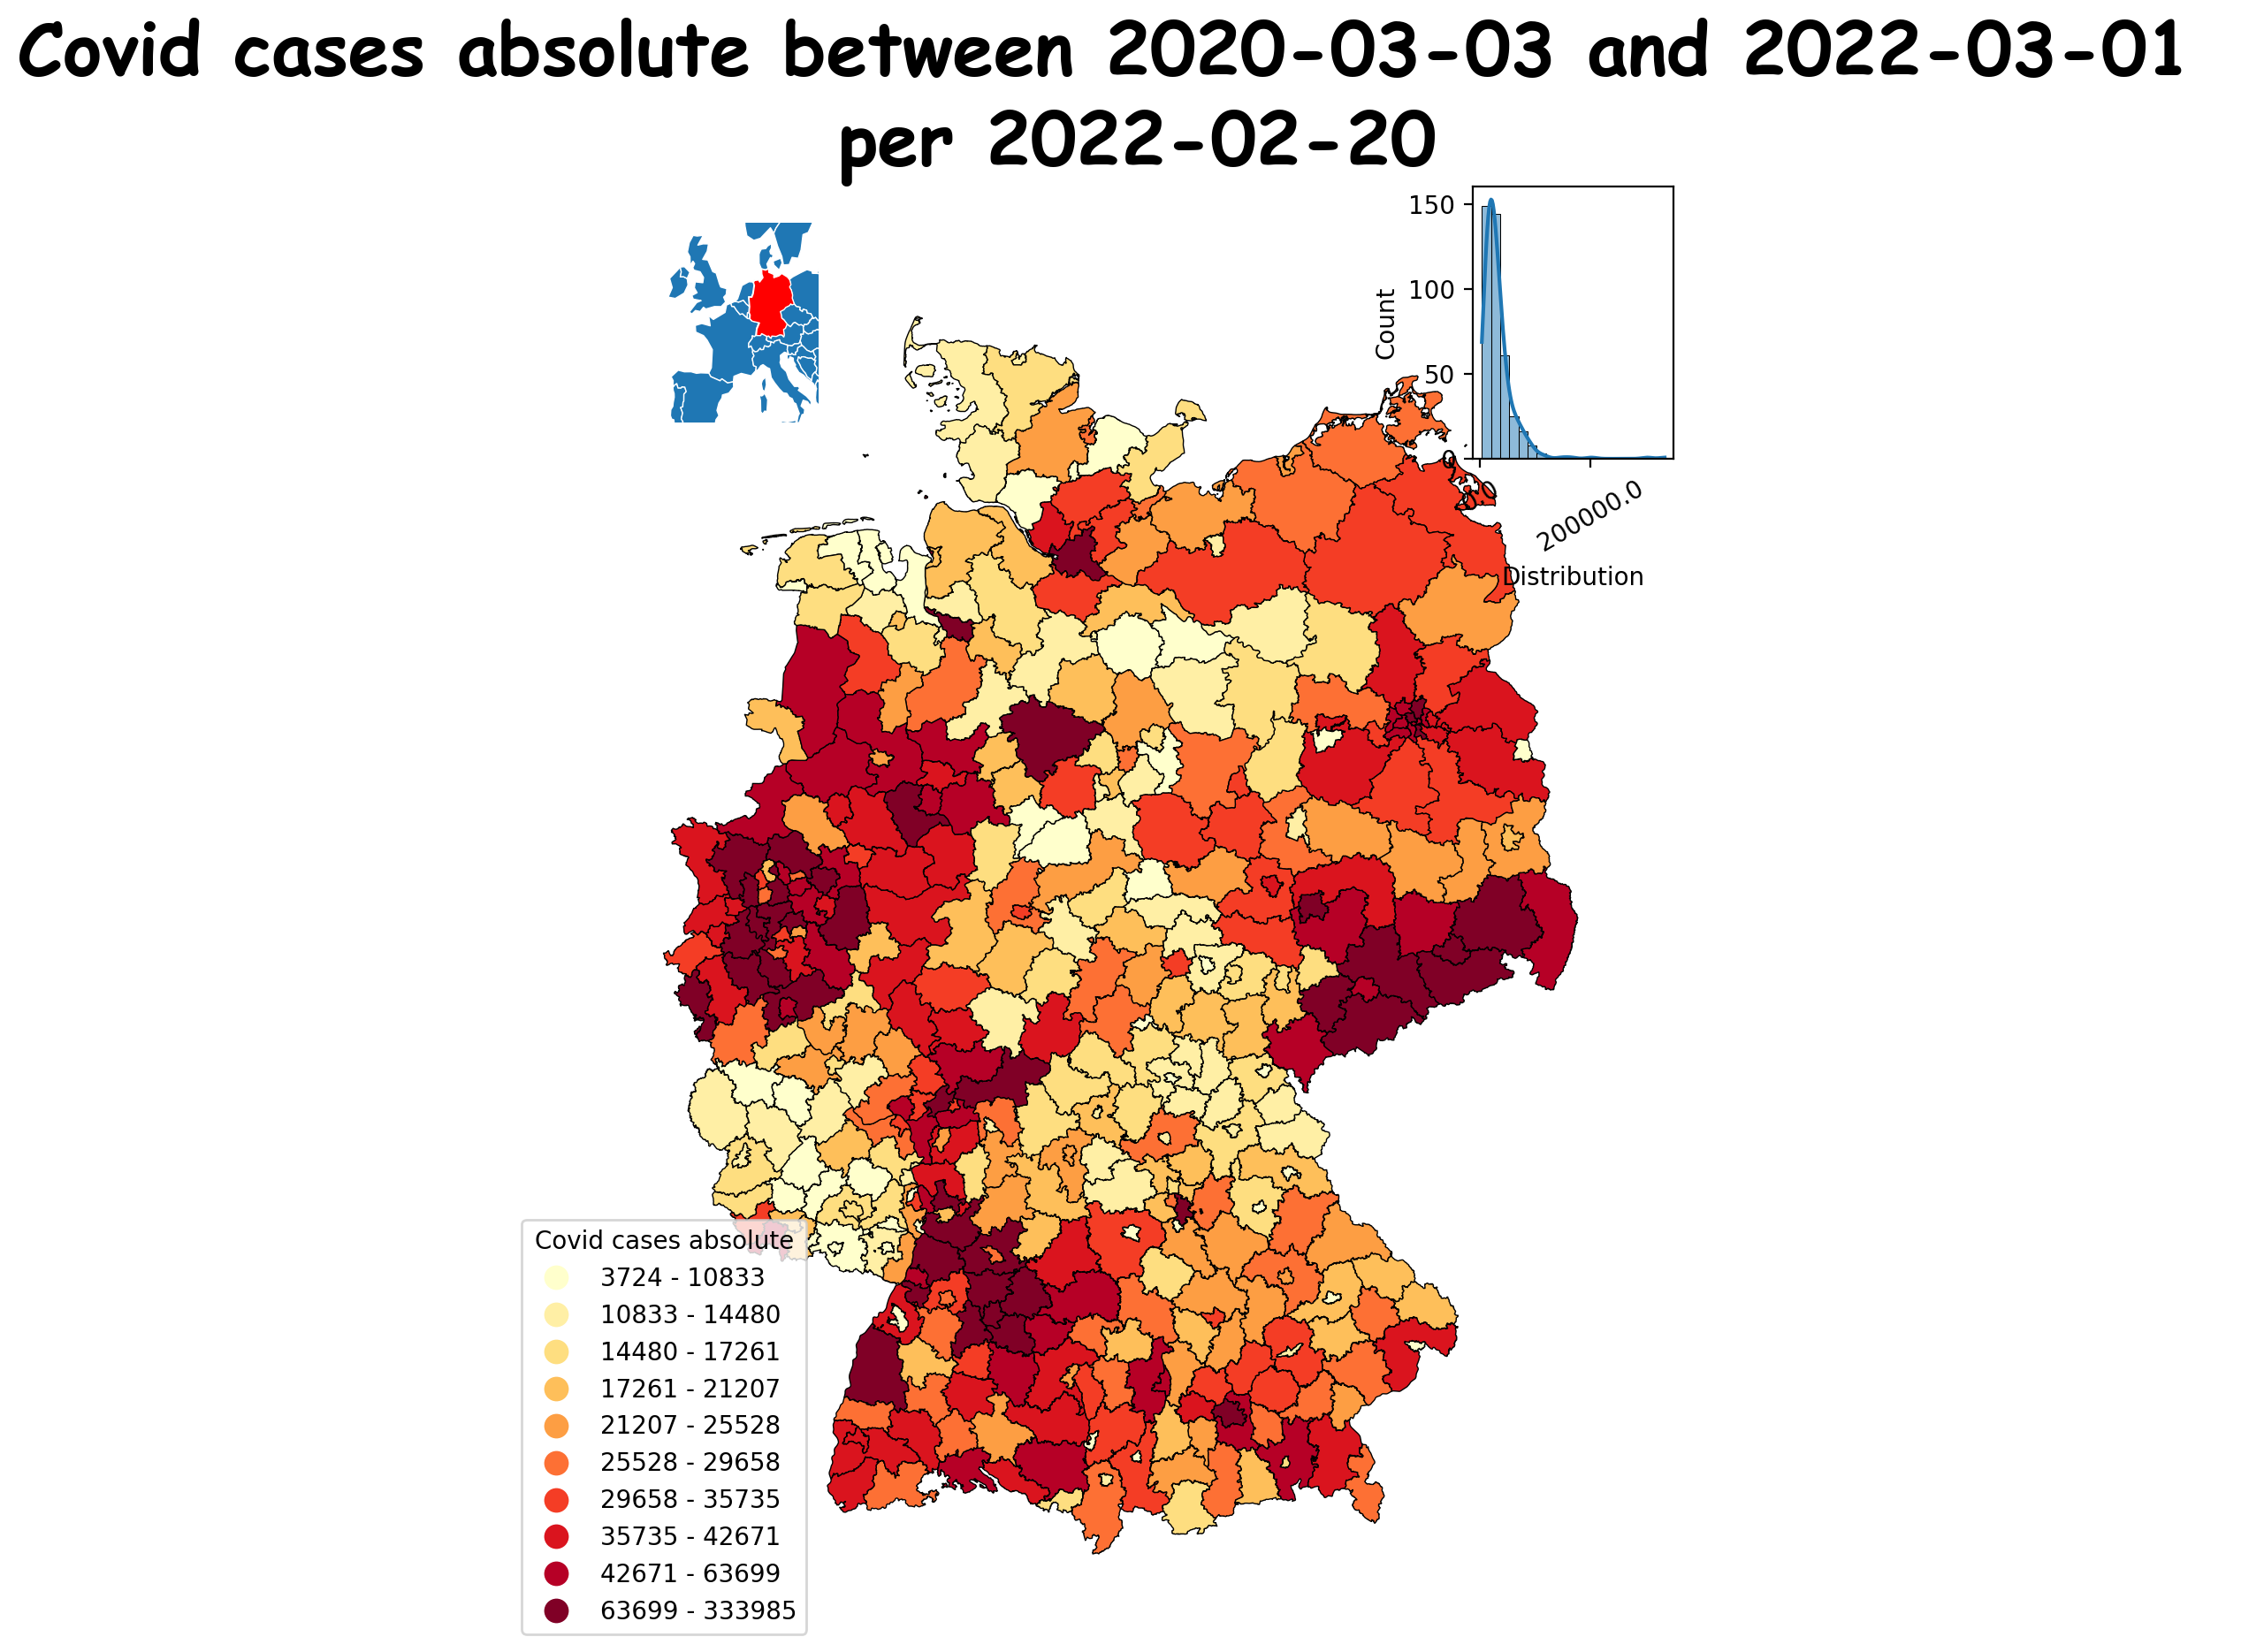

In [37]:
name = 'Covid cases absolute'
column = pd.Series(map_df_combined['cases'], name = name)
countries = ['Germany']
russia = ['Russia']

#plot the density
fig, de_ax = plt.subplots(figsize=(12,10))
plt.style.use('default')

de_ax.axis('off')


map_df_combined.plot(column=column, 
                cmap='YlOrRd',#'tab20', 
                label=column, 
                scheme='quantiles',
                legend=True,
                k=10,
                ec='black',
                lw=.5,
                ax=de_ax)

plt.title(f'{name} between {start} and {stop} \n per {updated}', 
          fontname="Comic Sans MS", fontsize=30, fontweight="bold")

eu_ax = de_ax.inset_axes([0.05,0.85,.15,.20])
world.loc[(world['continent'] == 'Europe') & (~world['name'].isin([countries, russia]))].plot(
    ax=eu_ax, ec='white', lw=.5)
world.loc[world['name'].isin(countries)].plot(
    ax=eu_ax, ec='white', fc = 'red', lw=.5)


eu_ax.set_xlim(-10,20)
eu_ax.set_ylim(38,60)
eu_ax.axis('off')
# get all upper bounds

hist_ax = de_ax.inset_axes([0.85,0.85,.20,.20])
# map_df_combined['CovDens'].plot(kind='hist', ax=hist_ax)

x = pd.Series(column, name='Distribution')
sns.histplot(x, bins=20,ax=hist_ax, kde=True)
a=hist_ax.get_xticks().tolist()
hist_ax.set_xticklabels(a, rotation=30)
# hist_ax.set_xticklabels(hist_ax.get_xticklabels(), rotation = 30)
# sns.kdeplot(data=x, c='red', ax=hist_ax, zorder=99)

upper_bounds = mapclassify.Quantiles(column, k=10).bins

# get and format all bounds
bounds = []
for index, upper_bound in enumerate(upper_bounds):
    if index == 0:
        lower_bound = column.min()
    else:
        lower_bound = upper_bounds[index-1]

    # format the numerical legend here
    bound = f'{lower_bound:.0f} - {upper_bound:.0f}'
    bounds.append(bound)

# get all the legend labels
legend_labels = de_ax.get_legend().get_texts()

# replace the legend labels
for bound, legend_label in zip(bounds, legend_labels):
    legend_label.set_text(bound)
                                     
leg = de_ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.3))

leg.set_title(name)
plt.setp(leg.get_title(), multialignment='center')
plt.setp(leg.get_texts(), multialignment='center');


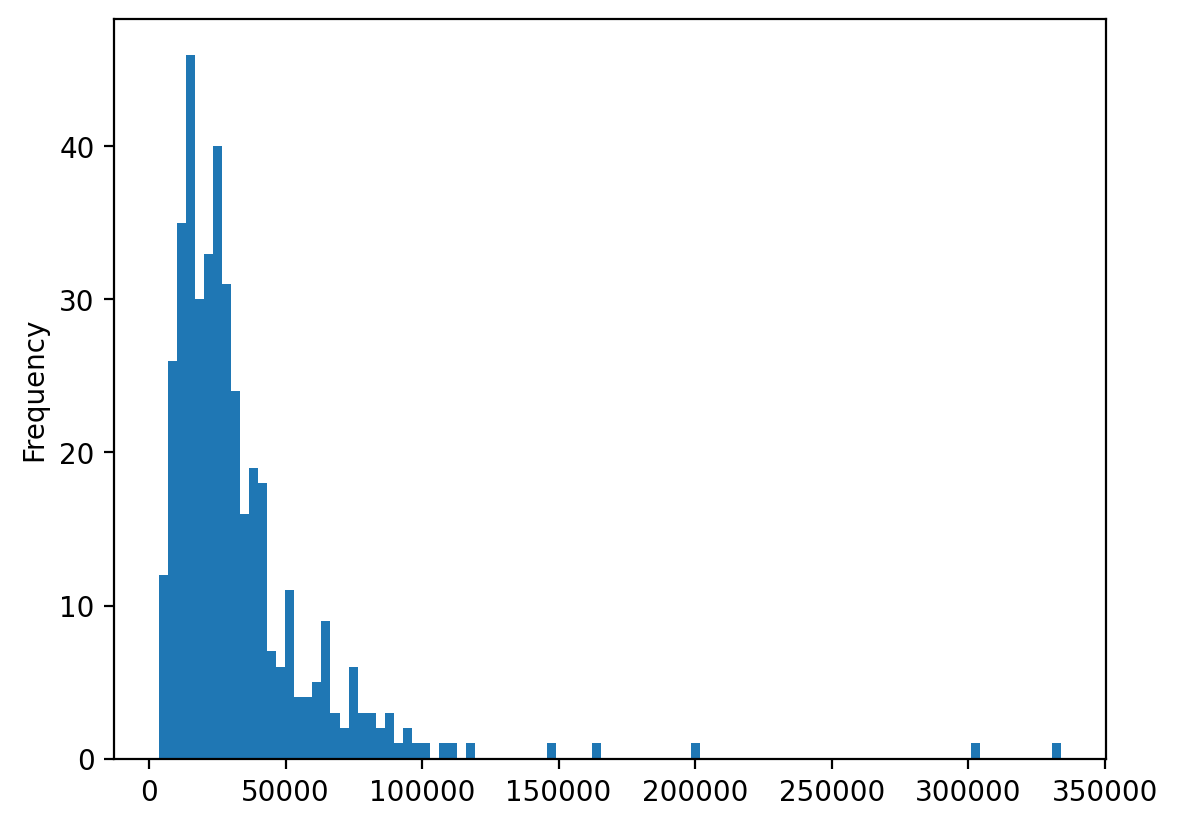

In [20]:
map_df_combined['cases'].plot(kind='hist', bins=100);

In [21]:
map_df_combined_de = map_df_combined.to_crs(epsg=28992)

map_df_combined_de.to_pickle('cookbooks/sources/map_df_combined_de')

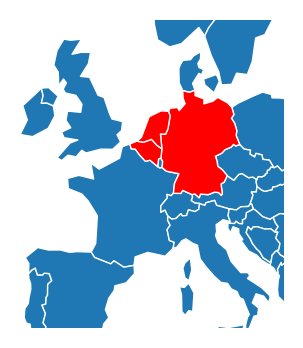

In [42]:
#plot the density
plt.figure(figsize=(2,2))
eu_ax = plt.axes()

world.loc[(world['continent'] == 'Europe') & (~world['name'].isin(['Russia', 'Germany', 'Belgium', 'Netherlands']))].plot(
    ax=eu_ax, ec='white', lw=.5)
world.loc[world['name'].isin(['Germany', 'Belgium', 'Netherlands'])].plot(
    ax=eu_ax, ec='white', fc = 'red', lw=.5)


plt.xlim(-10,20)
plt.ylim(38,60)
eu_ax.axis('off')

plt.show()
#                                               map_df.loc[map_df['GM_NAAM'].isin(['Beemster', 'Purmerend'])]

In [43]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
map_df_combined.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

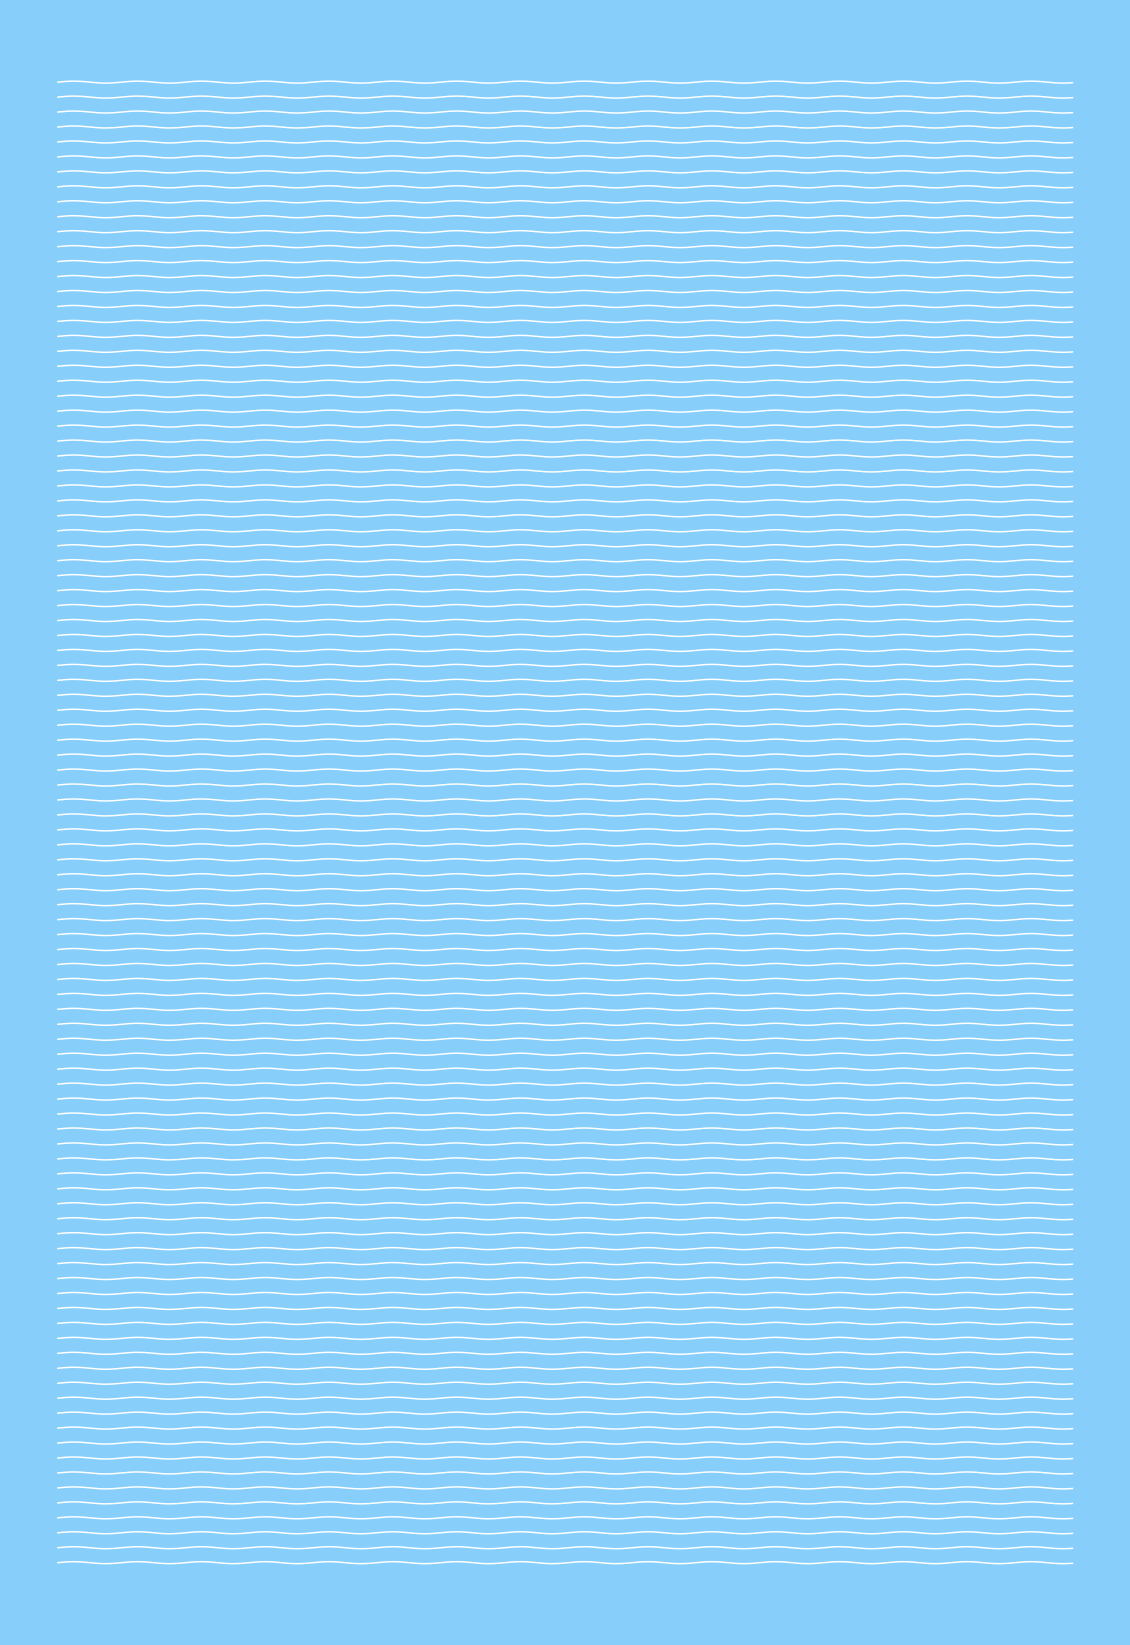

In [30]:
import numpy as np

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,30))
ax = plt.axes()
ax.axis('off')


fig.patch.set_facecolor('lightskyblue')
# Get x values of the sine wave
time        = np.arange(0, 100, 0.1);
# Amplitude of the sine wave is sine of a variable like time
amplitude   = np.sin(time)/150

 

# Plot a sine wave using time and amplitude obtained for the sine wave

for i in np.arange(0, 10, .1):
    ax.plot(time, amplitude + i, c='white', zorder=1)


plot.show()